In [1]:
#importing libraries
import os
import sys
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D,Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing glove.6B
!wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
#unzipping the glove files
!unzip '/content/glove.6B.zip'

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [2]:

glove_file = r'/content/drive/MyDrive/glove.6B.100d.txt'
embedding_dim = 100
validation_split = 0.2


In [4]:
#importing the dataset
!wget  https://www.dropbox.com/sh/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla?dl=0

--2020-11-25 12:30:12--  https://www.dropbox.com/sh/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla [following]
--2020-11-25 12:30:12--  https://www.dropbox.com/sh/raw/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc4cbe385cf4ca8bd83558a8908.dl.dropboxusercontent.com/zip_download_get/AnQ3DroqZmTWBu-EI4BiFarBSJ2BlL_N8bdQFLRhdRTz_Zb3TyTvfGSZBb4SBQ5auq7YDEJpruD0TrcT4Cu_sslNkaacBuIBUrEdngxlAXXvqw [following]
--2020-11-25 12:30:12--  https://ucc4cbe385cf4ca8bd83558a8908.dl.dropboxusercontent.com/zip_download_get/AnQ3DroqZmTWBu-EI4BiFarBSJ2BlL_N8bdQFLRhdRTz_Zb3TyTvfGSZBb4SBQ5auq7YDEJpruD0TrcT4Cu_

In [5]:
!unzip '/content/AAAw1_JIzpuVvwteJCma0xMla?dl=0'

Archive:  /content/AAAw1_JIzpuVvwteJCma0xMla?dl=0
mapname:  conversion of  failed
 extracting: train.csv               

1 archive had fatal errors.


In [16]:
full_data = r'/content/train.csv'

In [17]:
full_data = pd.read_csv(full_data)

In [18]:
full_data

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [19]:
#drop the qid column
full_data.drop(['qid'],axis=1,inplace=True)

In [20]:
full_data

,question_text,target
0,How did Quebec nationalists see their province...,0
1,"Do you have an adopted dog, how would you enco...",0
2,Why does velocity affect time? Does velocity a...,0
3,How did Otto von Guericke used the Magdeburg h...,0
4,Can I convert montra helicon D to a mountain b...,0
...,...,...
1306117,What other technical skills do you need as a c...,0
1306118,Does MS in ECE have good job prospects in USA ...,0
1306119,Is foam insulation toxic?,0
1306120,How can one start a research project based on ...,0


In [21]:
#format our text samples and labels into tensors in order to feed them into a neural network
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(full_data['question_text'])
sequences = tokenizer.texts_to_sequences(full_data['question_text'])

In [22]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 222161 unique tokens.


In [23]:
#finding the max_elnth of the sequence
max_len = 0
i= 0 
for i in range(len(sequences)):
    if len(sequences[i]) > max_len:
        max_len = len(sequences[i])
        #print(max_len)
        #print(sequences[i])
print(max_len)
        
    

190


In [24]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X_data = pad_sequences(sequences, maxlen=max_len)


Found 222161 unique tokens.


In [25]:

labels = to_categorical(np.asarray(full_data['target']))
print(labels.shape)
print(X_data.shape)

(1306122, 2)
(1306122, 190)


In [27]:
# split the data into a training set and a validation set
indices = np.arange(X_data.shape[0])
np.random.shuffle(indices)
X_data = X_data[indices]
labels = labels[indices]
nb_validation_samples = int(validation_split * X_data.shape[0])
print(nb_validation_samples)

x_train = X_data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = X_data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

261224


In [28]:
x_train

array([[   0,    0,    0, ...,    6,    1,   94],
       [   0,    0,    0, ...,    4, 1463,  399],
       [   0,    0,    0, ...,    5, 1355,   54],
       ...,
       [   0,    0,    0, ...,    6, 1079,  300],
       [   0,    0,    0, ...,  363,    6,  815],
       [   0,    0,    0, ...,   90, 9169,  274]], dtype=int32)

In [29]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [30]:
#preparing the embedding layer
embeddings_index = {}
f = glove_file
f = open(f,encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [32]:
#we can leverage our embedding_index dictionary and our word_index to compute our embedding matrix:
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [33]:
embedding_matrix.shape

(222162, 100)

In [35]:
#We load this embedding matrix into an Embedding layer. Note that we set trainable=False to prevent the weights from being updated during training.
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False)

In [41]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [43]:
deep_inputs = Input(shape=(max_len,))
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1= Dense(128, activation='relu')(LSTM_Layer_1)

dense_layer_2 = Dense(2, activation='sigmoid')(dense_layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_2)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [44]:
print(model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 190)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 190, 100)          22216200  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 22,350,218
Trainable params: 134,018
Non-trainable params: 22,216,200
_________________________________________________________________
None


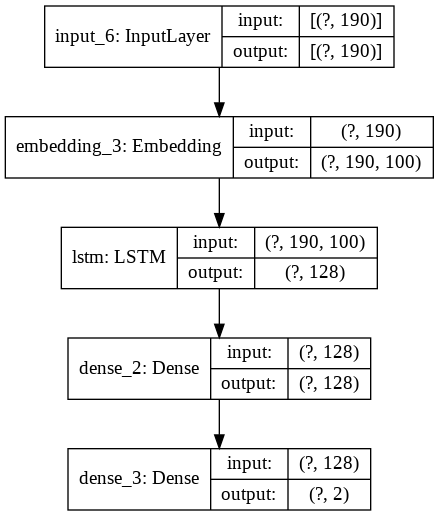

In [45]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [51]:
history = model.fit(x_train, y_train, batch_size=184
                    , epochs=5, verbose=1, validation_split=0.2,validation_data=(x_val,y_val))

Epoch 1/5
4544/4544 [==============================] - 103s 23ms/step - loss: 0.1097 - acc: 0.9570 - val_loss: 0.1078 - val_acc: 0.9575
Epoch 2/5
4544/4544 [==============================] - 103s 23ms/step - loss: 0.1032 - acc: 0.9590 - val_loss: 0.1070 - val_acc: 0.9579
Epoch 3/5
4544/4544 [==============================] - 103s 23ms/step - loss: 0.1016 - acc: 0.9593 - val_loss: 0.1058 - val_acc: 0.9585
Epoch 4/5
4544/4544 [==============================] - 103s 23ms/step - loss: 0.0945 - acc: 0.9620 - val_loss: 0.1072 - val_acc: 0.9582
Epoch 5/5
4544/4544 [==============================] - 103s 23ms/step - loss: 0.0902 - acc: 0.9636 - val_loss: 0.1105 - val_acc: 0.9567


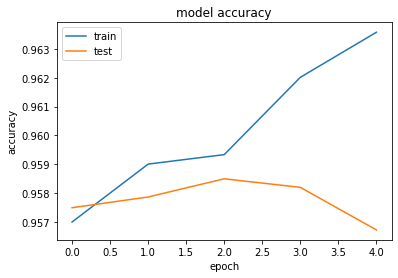

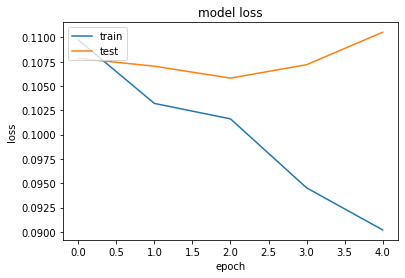

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [53]:
#prediction on x_val
y_pred = model.predict(x_val)


In [54]:
y_val

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [55]:
y_pred [y_pred > 0.5] = 1.0
y_pred[y_pred <= 0.5] = 0.0

In [56]:
y_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [57]:
from  sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_val,y_pred)

In [58]:
auc

0.8111228684248086

In [59]:
pred = pd.DataFrame(y_pred)


In [60]:
#exporting predictions to predictions file
pred.to_csv('predctions.csv',index=False)

In [63]:
#saving weights
model.save_weights('prj_3_1D_CNN.h5')

In [64]:
from tensorflow.keras.models import model_from_json

In [65]:
model_json = model.to_json()

In [66]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [67]:
model.save_weights("model.h5")

In [68]:
from tensorflow.keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [69]:
loaded_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 190)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 190, 100)          22216200  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 22,350,218
Trainable params: 134,018
Non-trainable params: 22,216,200
_________________________________________________________________


In [70]:
loaded_model.load_weights("model.h5")

In [71]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
loaded_model.fit(images_train,labels_train,validation_data=[images_test,labels_test],
         epochs=3,batch_size=50,verbose=1)